In [14]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from adjustText import adjust_text

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [15]:
df_DA_US = df_DA_US.explode('job_skills') #It turns list values into multiple rows.
df_DA_US[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [17]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_salary = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_US_skill = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

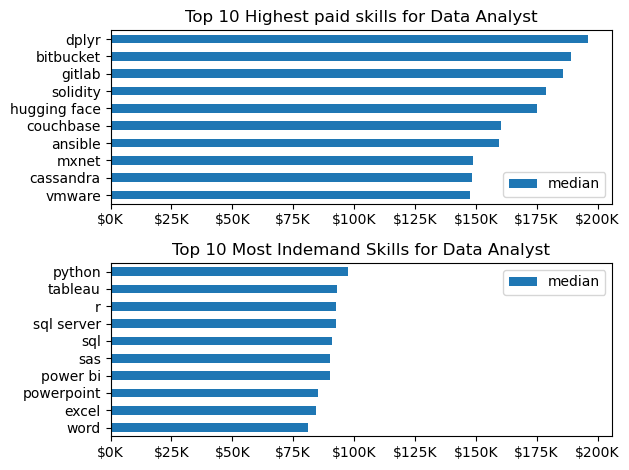

In [20]:
fig, ax = plt.subplots(2, 1)

df_DA_US_salary[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest paid skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_US_skill[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Indemand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

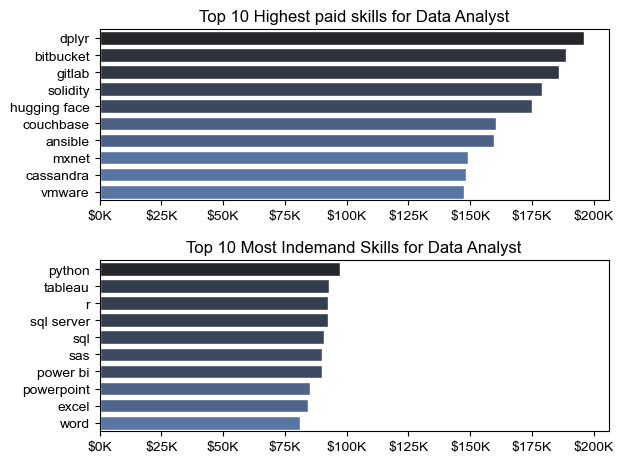

In [25]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

sns.barplot(data=df_DA_US_salary, x='median', y=df_DA_US_salary.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_DA_US_salary[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest paid skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_US_skill, x='median', y=df_DA_US_skill.index, ax=ax[1], hue='median', palette='dark:b_r')
#df_DA_US_skill[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Indemand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()